# Project 7 - Event Driven Finance

In [45]:
import sys
sys.path.append('../utils/')

from query import query_dataframe_f, pprint_query, nbprint_and_query
use_latex = False

## Problem 3

In [23]:
# Much of the code for candlestick plotting comes from this page:
# http://matplotlib.org/examples/pylab_examples/finance_demo.html
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
def plot_candlestick(values):
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
    dayFormatter = DateFormatter('%d')      # e.g., 12
    
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    
    candlestick_ohlc(ax, values, width=1, colorup='g', colordown='r', alpha=0.75)
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    
    plt.grid(True)
    plt.gcf().set_size_inches(10, 6)
    
    return fig, ax

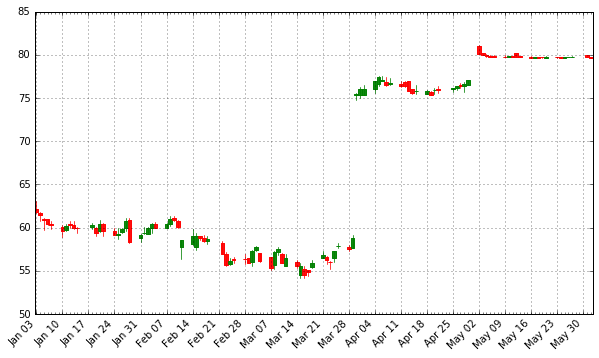

In [52]:
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import date2num
%matplotlib inline
data = query_dataframe_f('Q3-stock.sql')

# Candlestick plot of Open - High - Low- Close chart
data['date2num'] = data['Date'].apply(date2num)
plot_candlestick(data[['date2num', 'OpenPrice', 'AskHigh', 'BidLow', 'ClosePrice']].values);

There are two events that stick out to us. First, at the end of March, [Cephalon announces that they will buy ChemGenex](http://www.marketwatch.com/story/cephalon-to-buy-chemgenex-pharmaceuticals-2011-03-28) which propels the stock significantly higher. Second, at the end of April, Teva Pharmaceuticals announces that they will acquire Cephalon and the stock trades around this point for the rest of its listed time.

We will now plot the implied volatilities for the 30-, 40-, and 50-delta current-expiration options. To get the exact delta, we will interpolate between the prices surrounding a delta value to approximate an exact delta, and do our implied volatility calculations given that data.